# Attempting to Crossmatch Lamost with Megan's Gaia-Kepler crossmatched catalog

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.coordinates import FK5
from astropy.coordinates import ICRS
import astropy.coordinates as coord
from astropy.table import Table

plotpar = {'axes.labelsize': 30,
                  'font.size': 22,
                  'legend.fontsize': 15,
                  'xtick.labelsize': 30,
                  'ytick.labelsize': 30,
                  'text.usetex': True}
plt.rcParams.update(plotpar)

Coordinates of the Kepler field:

In [2]:
from astropy.coordinates import SkyCoord
c = SkyCoord('19h22m40s', '+44d30m00s', frame='icrs')
kepler_ra, kepler_dec = c.ra.value, c.dec.value
kepler_ra, kepler_dec

(290.6666666666667, 44.5)

Load the full LAMOST stellar catalog. Column descriptions are here: http://dr5.lamost.org/v3/doc/data-production-description#toc_16

In [3]:
# with fits.open("../../data/lamost_dr5_v3_stellar.fits") as data:
#     lamost_stellar = pd.DataFrame(data[1].data, dtype="float64")

In [4]:
# Column descriptions are here: http://dr5.lamost.org/v3/doc/data-production-description#toc_16
# for k in lamost_stellar.keys():
#     print(k)

In [5]:
# ndeg_ra = 12
# ndeg_dec = 10
# sky_mask = (kepler_ra-ndeg_ra < lamost_stellar.ra.values) & (lamost_stellar.ra.values < kepler_ra+ndeg_ra)
# sky_mask &= (kepler_dec-ndeg_dec < lamost_stellar.dec.values) & (lamost_stellar.dec.values < kepler_dec+ndeg_dec)
# lamost_kepler_sky = lamost_stellar.iloc[sky_mask]

Load just the lamost catalog that's near the Kepler footprint:

In [6]:
lamost_kepler_sky = pd.read_csv("../data/lamost_near_kepler_footprint.csv")

Load the Gaia-Kepler crossmatch:

In [7]:
with fits.open("../../data/kepler_edr3_1arcsec.fits") as data:
    gaia3 = pd.DataFrame(data[1].data, dtype="float64")

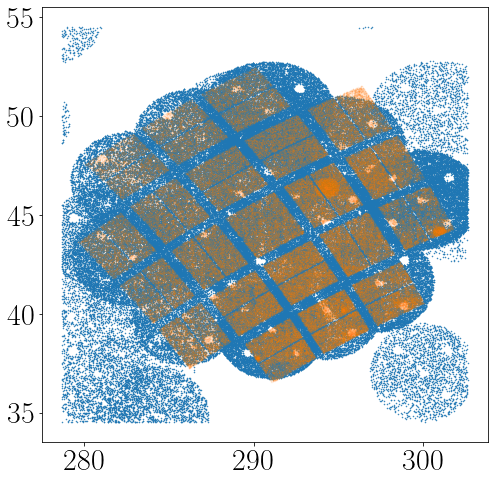

In [8]:
plt.figure(figsize=(8,8))
plt.plot(lamost_kepler_sky.ra, lamost_kepler_sky.dec, ".", ms=1, zorder=0)
plt.plot(gaia3.ra, gaia3.dec, ".", zorder=1, ms=1, alpha=.1)

In [21]:
lamost_edr3 = pd.read_csv("../data/LAMOST-EDR3_1arcsec_Xmatch.csv")
lamost_edr3_distances = pd.read_csv("../data/LAMOST-EDR3_distances_1arcsec_Xmatch.csv")

In [9]:
from astropy.coordinates import SkyCoord
c = SkyCoord('19h22m40s', '+44d30m00s', frame='icrs')
c.ra.value, c.dec.value

(290.6666666666667, 44.5)

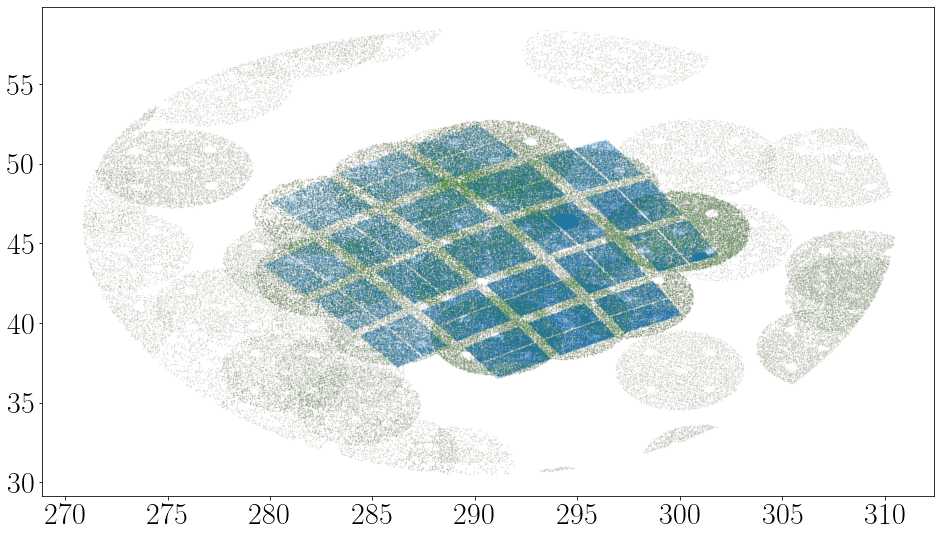

In [40]:
plt.figure(figsize=(16, 9))
plt.plot(gaia3.ra, gaia3.dec, ".", zorder=1, ms=1, alpha=.1)
# plt.plot(c.ra.value, c.dec.value, "o")
ndeg = 14
# plt.plot(c.ra.value+ndeg, c.dec.value+ndeg, "o")
# plt.plot(c.ra.value+ndeg, c.dec.value-ndeg, "o")
# plt.plot(c.ra.value-ndeg, c.dec.value-ndeg, "o")
# plt.plot(c.ra.value-ndeg, c.dec.value+ndeg, "o")
plt.plot(lamost_edr3.RAJ2000, lamost_edr3.DEJ2000, "C6.", zorder=0, ms=1, alpha=.1)
plt.plot(lamost_edr3_distances.RAJ2000, lamost_edr3_distances.DEJ2000, "C2.", zorder=0, ms=1, alpha=.1)

In [41]:
for k in lamost_edr3.keys():
    print(k)

angDist
_RAJ2000
_DEJ2000
RAJ2000
DEJ2000
Teff
e_Teff
q_Teff
logg
e_logg
q_logg
Vt
e_Vt
q_Vt
[Fe/H]
e_[Fe/H]
q_[Fe/H]
[C/Fe]
q_[C/Fe]
[N/Fe]
q_[N/Fe]
[O/Fe]
q_[O/Fe]
[Na/Fe]
q_[Na/Fe]
[Mg/Fe]
q_[Mg/Fe]
[Al/Fe]
q_[Al/Fe]
[Si/Fe]
q_[Si/Fe]
[Ca/Fe]
q_[Ca/Fe]
[Ti/Fe]
q_[Ti/Fe]
[Cr/Fe]
q_[Cr/Fe]
[Mn/Fe]
q_[Mn/Fe]
[Co/Fe]
q_[Co/Fe]
[Ni/Fe]
q_[Ni/Fe]
[Cu/Fe]
q_[Cu/Fe]
[Ba/Fe]
q_[Ba/Fe]
Mult
SubClass
LAMOST
ra_epoch2000
dec_epoch2000
errHalfMaj
errHalfMin
errPosAng
source_id
ra
ra_error
dec
dec_error
parallax
parallax_error
parallax_over_error
pm
pmra
pmra_error
pmdec
pmdec_error
astrometric_n_good_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
pseudocolour
pseudocolour_error
visibility_periods_used
ruwe
duplicated_source
phot_g_mean_flux
phot_g_mean_flux_error
phot_g_mean_mag
phot_bp_mean_flux
phot_bp_mean_flux_error
phot_bp_mean_mag
phot_rp_mean_flux
phot_rp_mean_mag
phot_bp_rp_excess_factor
bp_rp
dr2_radial_veloc

In [42]:
lamost_edr3.LAMOST

0         LAMOST
1         LAMOST
2         LAMOST
3         LAMOST
4         LAMOST
           ...  
258358    LAMOST
258359    LAMOST
258360    LAMOST
258361    LAMOST
258362    LAMOST
Name: LAMOST, Length: 258363, dtype: object